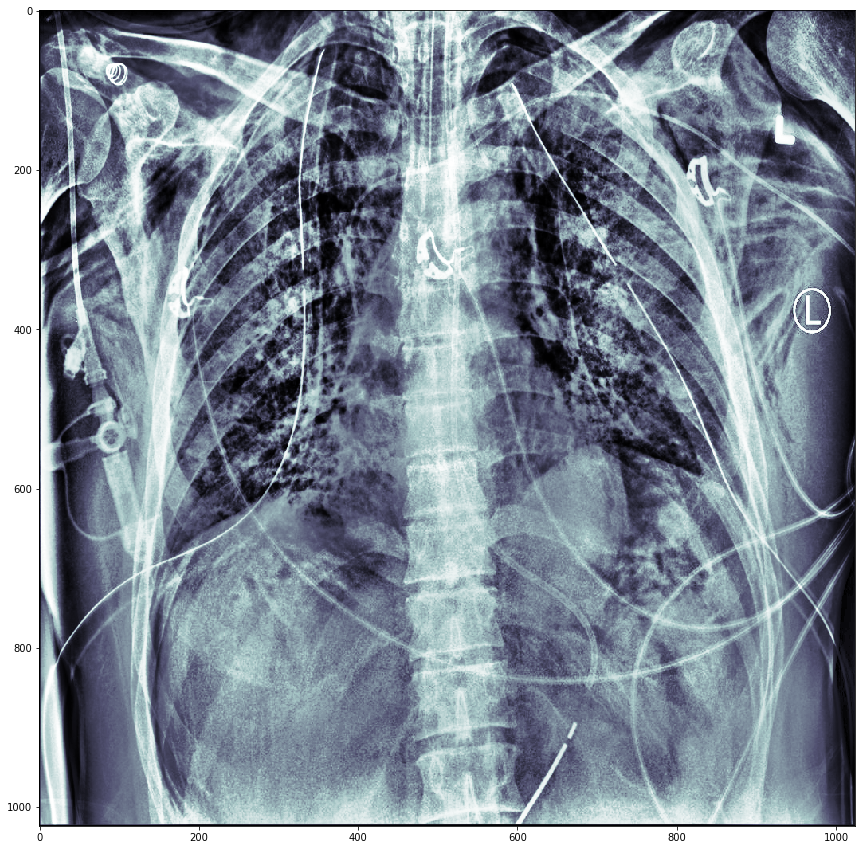

In [2]:
import numpy as np
import pydicom
from mask_functions import mask2rle, rle2mask
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from imgaug import augmenters as ia
from skimage import exposure

fig, ax1 = plt.subplots(1, figsize=(15,15))
ROOT_DIR = os.path.abspath("../")
dataset_dir ="datasets/pneumothorax/"
dataset_dir = os.path.join(ROOT_DIR, dataset_dir)

dataset_dir = os.path.join(dataset_dir, "val")
annotations = pd.read_csv(os.path.join(dataset_dir,"val-rle.csv"),header=None)
annotations.columns = ['ImageId', 'ImageEncoding']
annotations = annotations[annotations.iloc[:, 1] != "-1"]
image_ids = annotations.iloc[:, 0].values
rles = annotations.iloc[:, 1].values
img_len  = image_ids.shape[0]
img_id = "1.2.276.0.7230010.3.1.4.8323329.13555.1517875246.605477"
encoding = ""
if img_id == "":
    index = np.random.randint(0,img_len -1)
    img_id = image_ids[index]
    encoding = rles[index]
else:
    for row in annotations.itertuples():
            id = row.ImageId
            id_encoding = row.ImageEncoding
            if id == img_id:
                img_id = id
                encoding = id_encoding
                break
            
image_path = os.path.join(dataset_dir, img_id + ".dcm")
image = pydicom.dcmread(image_path)
height = image.Rows
width = image.Columns
mask = rle2mask(encoding, width, height)
mask = mask.reshape(height, width, 1)
img = image.pixel_array
img = exposure.equalize_adapthist(img, clip_limit=0.03)
#img = exposure.equalize_hist(img)
ax1.imshow(img, cmap='bone')
rle_m1 = rle2mask(encoding, 1024, 1024)
#ax1.imshow(rle_m1.T, cmap = 'gray',alpha = 0.1)


plt.show()



In [7]:
augmentation = ia.Sometimes(0.5, [
    ia.Fliplr(0.5),
    ia.GaussianBlur(sigma=(0.0, 5.0)),
    ia.OneOf([ ## geometric transform
        ia.Affine(
            scale={"x": (0.98, 1.02), "y": (0.98, 1.04)},
            translate_percent={"x": (-0.02, 0.02), "y": (-0.04, 0.04)},
            rotate=(-2, 2),
            shear=(-1, 1)),
        ia.PiecewiseAffine(scale=(0.001, 0.025))]),
    ia.OneOf([ ## brightness or contrast
        ia.Multiply((0.9, 1.1)),
        ia.ContrastNormalization((0.9, 1.1))]),
    ia.OneOf([ ## blur or sharpen
        ia.GaussianBlur(sigma=(0.0, 0.1)),
        ia.Sharpen(alpha=(0.0, 0.1))])
    ])  

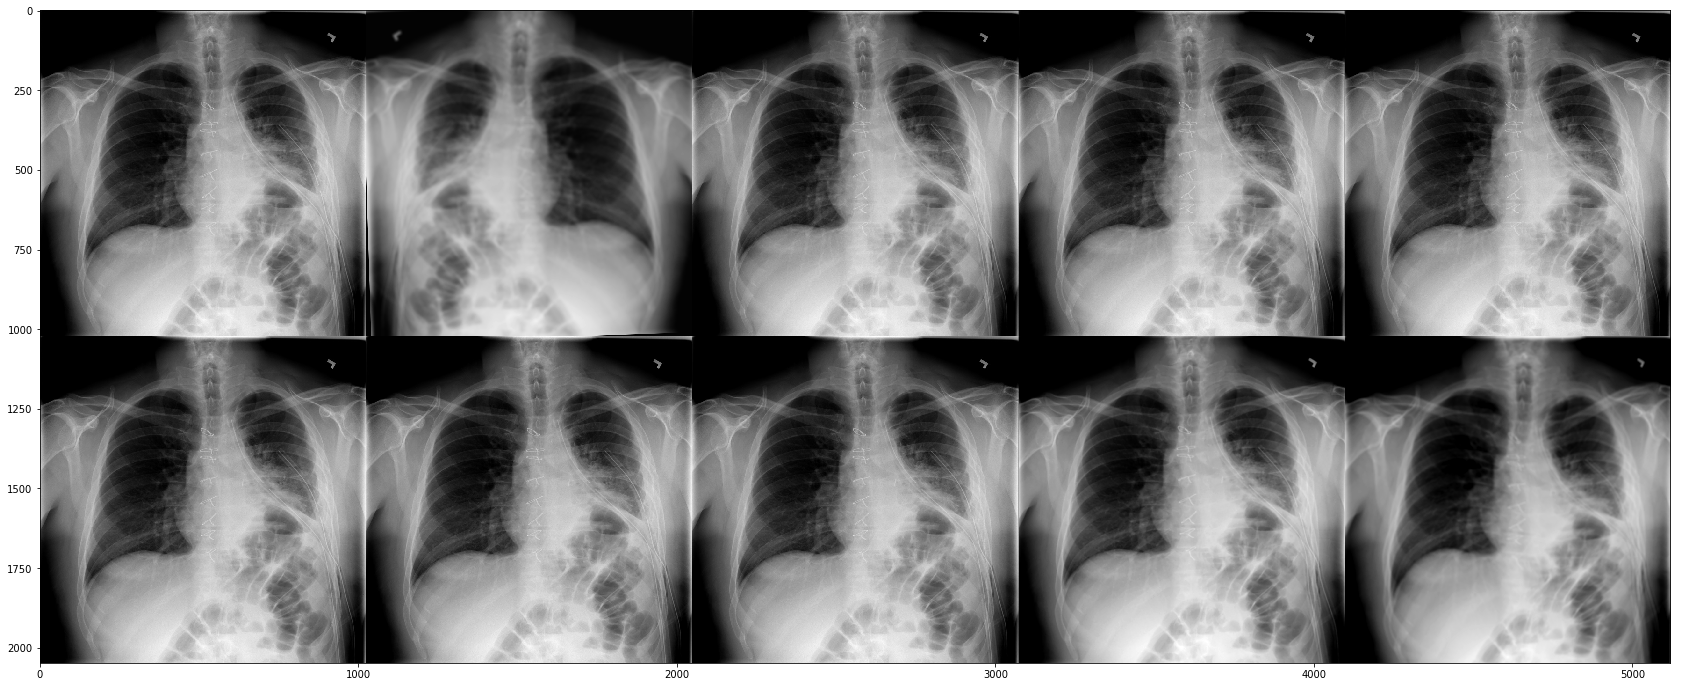

In [9]:
img = image.pixel_array
grid = augmentation.draw_grid(img, cols=5, rows=2)
plt.figure(figsize=(30, 12))
_ = plt.imshow(grid[:, :, 0], cmap='gray')

In [42]:
print(img_id)

1.2.276.0.7230010.3.1.4.8323329.14122.1517875249.721467


In [43]:
print(encoding)

 176782 9 1012 28 997 33 992 37 988 38 987 39 986 39 986 38 987 38 987 37 988 37 988 37 988 37 988 37 988 36 988 37 988 36 989 36 989 35 990 34 991 33 992 33 992 32 993 31 995 29 997 27 1000 24 1004 20 1007 17 1009 15 1010 14 1011 13 1011 13 1011 13 1011 13 1011 13 1011 13 1011 13 1011 13 1011 13 1011 13 1011 12 1012 12 1012 12 1011 12 1012 12 1012 12 1012 11 1013 11 1013 11 1012 11 1013 11 1013 11 1012 11 1013 10 1014 9 1014 10 1014 10 1013 11 1013 11 1013 11 1012 11 1013 11 1013 11 1012 12 1012 12 1012 11 1012 12 1012 12 1012 11 1013 11 1012 12 1012 11 1013 11 1012 12 1012 11 1012 12 1012 11 1012 12 1012 11 1012 12 1012 11 1013 11 1012 12 1012 12 1012 12 1011 12 1012 12 1011 13 1011 13 1010 13 1011 13 1011 13 1011 12 1012 12 1011 13 1011 12 1012 12 1011 13 1011 12 1012 12 1011 13 1011 13 1011 13 1010 14 1010 13 1011 13 1011 13 1011 13 1011 13 1010 14 1010 13 1011 13 1011 12 1012 12 1012 11 1013 10 1014 10 1014 9 1015 2 1 6 1015 1 1023 1


In [50]:
print(np.unique(mask.flatten()))

[  0. 255.]
